# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [283]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

#### 1) Наши типы данных: целые числа и объекты (строковые или смешанные значения(?)/ дискретные(целые??) и категориальные переменные
#### 2) В удобном формате не считались данные-объекты, они представляют собой строковый тип, работать с ними и проводить анализ в таком виде куда менее удобно. К таким относятся: Education, Marital_Status, Income, DT_customer, Country

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [284]:
# Ваш супер-код
df['Income']=df['Income'].str.strip('$')
df['Income']=df['Income'].str.replace('.','')
df['Income']=df['Income'].str.replace(',','.')
df['Income'] = df['Income'].astype(float)
df['Income']

/var/folders/mp/4ncxpf7d2wg2lslq6lky9swh0000gn/T/ipykernel_68503/2296052682.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income']=df['Income'].str.replace('.','')


0       84.835
1       57.091
2       67.267
3       32.474
4       21.474
         ...  
2235    66.476
2236    31.056
2237    46.310
2238    65.819
2239    94.871
Name: Income, Length: 2240, dtype: float64

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [285]:
import datetime
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] #источник:https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [286]:
# Ваш код и комментарий
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

#### Итак, у нас 24 пропуска в категории Income, чтобы их заполнить, 1) проверим, распределены ли данные нормально 2) -если да берем в качестве "заполнителя" среднее, если нет-медиану,тк она не чувствительна к выбросам

<AxesSubplot:>

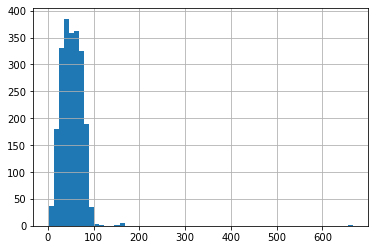

In [287]:
# итак сперва проверим наше распределение признака на нормальность
df['Income'].hist(bins=60) 
# из гистограммы видно, что распределение нормально=> заполняем пропуски средним

In [288]:
df['Income']=df['Income'].fillna(df['Income'].mean())

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

####  Выбросы - аномальные значения, они демонстрируют сильно отклоняющиеся от среднего и медианы значения, которые могут привести к неточностям в анализе данных
#### Переходим к выбросам, для наглядности ниже три ячейки с графиками обнаруженых в признаках выбросов, из которых видно, что выбросы есть в Income, MntFruits, Year_Birth, MntWines, MntSweetProducts, MntFishProducts, MntMeatProducts, MntGoldProds, NumDealsPurchases, NumCatalogPurchases, NumWebPurchases, NumStorePurchases,NumWebVisitsMonth - то есть из небинарных и не строковых признаков - все, кроме Recency и NumStorePurchases

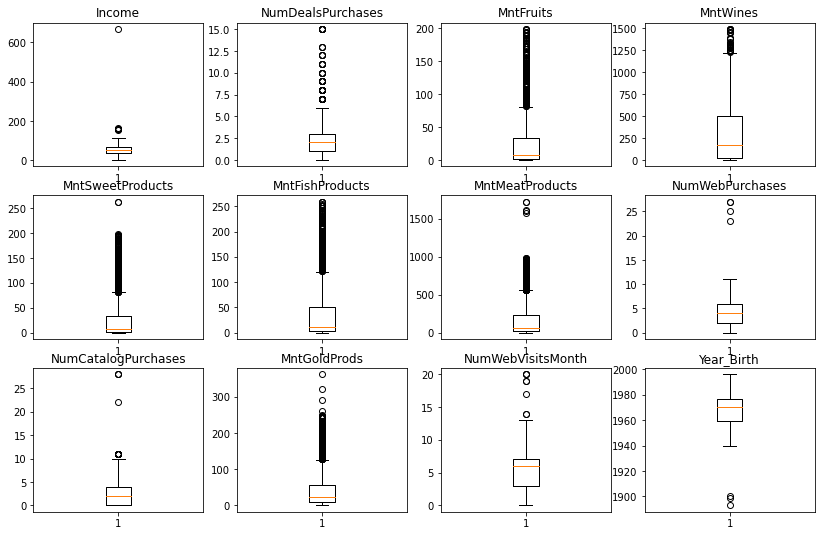

In [289]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,4, figsize=(14,9))

ax[0][0].boxplot(df.Income);
ax[0][0].set_title('Income');

ax[0][1].boxplot(df.NumDealsPurchases);
ax[0][1].set_title('NumDealsPurchases');

ax[0][2].boxplot(df.MntFruits);
ax[0][2].set_title('MntFruits');

ax[0][3].boxplot(df.MntWines)
ax[0][3].set_title('MntWines');

ax[1][0].boxplot(df.MntSweetProducts);
ax[1][0].set_title('MntSweetProducts');

ax[1][1].boxplot(df.MntFishProducts);
ax[1][1].set_title('MntFishProducts');

ax[1][2].boxplot(df.MntMeatProducts);#
ax[1][2].set_title('MntMeatProducts')

ax[1][3].boxplot(df.NumWebPurchases)
ax[1][3].set_title('NumWebPurchases');

ax[2][0].boxplot(df.NumCatalogPurchases);
ax[2][0].set_title('NumCatalogPurchases');

ax[2][1].boxplot(df.MntGoldProds);#нет выбросов
ax[2][1].set_title('MntGoldProds');

ax[2][2].boxplot(df.NumWebVisitsMonth)
ax[2][2].set_title('NumWebVisitsMonth');

ax[2][3].boxplot(df.Year_Birth)
ax[2][3].set_title('Year_Birth');


In [290]:
# численно можно проверить путем описательного метода и сравнения средних и максимально имеющихся у нас значений в признаках, явно выходящие за границы Q1:Q3 расстояния
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52.247251,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25.037797,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35.538750,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51.741500,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68.289750,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666.666000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
#берем получившиеся действительные небинарные переменные и с помощью межквантильного расстояния удаляем выбросы 

col1=['Income']
Q1 = df[col1].quantile(0.25)
Q3 = df[col1].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col1] < (Q1 - 1.5 * IQR)) |(df[col1] > (Q3 + 1.5 * IQR))).any(axis=1)]

col2=['MntWines']
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col2] < (Q1 - 1.5 * IQR)) |(df[col2] > (Q3 + 1.5 * IQR))).any(axis=1)]

col3=['MntFruits']
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col3] < (Q1 - 1.5 * IQR)) |(df[col3] > (Q3 + 1.5 * IQR))).any(axis=1)]

col4=['MntMeatProducts']
Q1 = df[col4].quantile(0.25)
Q3 = df[col4].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col4] < (Q1 - 1.5 * IQR)) |(df[col4] > (Q3 + 1.5 * IQR))).any(axis=1)]

col5=['MntFishProducts']
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col5] < (Q1 - 1.5 * IQR)) |(df[col5] > (Q3 + 1.5 * IQR))).any(axis=1)]

col6=['MntSweetProducts']
Q1 = df[col6].quantile(0.25)
Q3 = df[col6].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col6] < (Q1 - 1.5 * IQR)) |(df[col6] > (Q3 + 1.5 * IQR))).any(axis=1)]

col7=['MntGoldProds']
Q1 = df[col7].quantile(0.25)
Q3 = df[col7].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col7] < (Q1 - 1.5 * IQR)) |(df[col7] > (Q3 + 1.5 * IQR))).any(axis=1)]

col8=['NumDealsPurchases']
Q1 = df[col8].quantile(0.25)
Q3 = df[col8].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col8] < (Q1 - 1.5 * IQR)) |(df[col8] > (Q3 + 1.5 * IQR))).any(axis=1)]

col9=['NumCatalogPurchases']
Q1 = df[col9].quantile(0.25)
Q3 = df[col9].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col9] < (Q1 - 1.5 * IQR)) |(df[col9] > (Q3 + 1.5 * IQR))).any(axis=1)]

col10=['NumWebPurchases']
Q1 = df[col10].quantile(0.25)
Q3 = df[col10].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col10] < (Q1 - 1.5 * IQR)) |(df[col10] > (Q3 + 1.5 * IQR))).any(axis=1)]

col11=['NumWebVisitsMonth']
Q1 = df[col11].quantile(0.25)
Q3 = df[col11].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col11] < (Q1 - 1.5 * IQR)) |(df[col11] > (Q3 + 1.5 * IQR))).any(axis=1)]

col12=['Year_Birth']
Q1 = df[col12].quantile(0.25)
Q3 = df[col12].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[col12] < (Q1 - 1.5 * IQR)) |(df[col12] > (Q3 + 1.5 * IQR))).any(axis=1)]

#источник:https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles


## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [292]:
new_row1=df['MntWines']/df['Income'] #возможно среди покупателей много любителей вина, проверим сколько занимают траты на алкогольный напиток в сравнении с доходами клиентов в индексировнном виде
df['Diogenes_index'] = new_row1 
new_row2=df['NumWebPurchases']/df['NumWebVisitsMonth']*100 # проверим эффективность онлайн канала продаж с точки зрения трансформации лидов в клиентов, посчитам конверсию на сайте в %
df['Web_Conversion']=new_row2


## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

##### В опросе(сборе данных) участвовали люди из 8 стран, наиболее популярной из которых оказалась Испания, следовательно можно сделать вывод, что во время опроса покупателей-испанцев было больш других; также по уровню образвоования- наиболее частое-высшее, а семейное положение чаще всего соответствует графе 'женат/замужем'-озможно такие люди заказывают доставку чаще с целью... экономии времени на семью вместо готовки

In [293]:
# Ваш код и комментарий
df.describe(include='object')

,Education,Marital_Status,Country
count,1043,1043,1043
unique,5,6,7
top,Graduation,Married,SP
freq,500,406,525


Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

#### самому молодому покупателю 26 лет, а самому зрелому - 75; минимальная зп=$7,5к, согласно WorldPopulationReview это примено как средняя годовая зп в России, по качественным характеристикам корзины,  наиболее разняюшиеся значения в категории мяса, продукты с ним либо покупают в большей доле, чем остальные категории, либо не покупают совсем(битва: веганы-мясоеды?)

источник: https://worldpopulationreview.com/country-rankings/median-income-by-country

In [294]:
# Ваш код и комментарий
df.describe(include='number')

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Diogenes_index,Web_Conversion
count,1043.000000,1043.000000,1043.00000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,...,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,5618.631831,1970.850431,35.86593,0.759348,0.500479,48.795781,57.642378,4.600192,24.568552,6.321189,...,6.348993,0.059444,0.023011,0.000959,0.003835,0.003835,0.087248,0.009588,1.317597,37.634152
std,3254.138441,10.982916,12.69176,0.505817,0.535451,29.203461,99.660458,6.580104,26.887657,7.724590,...,1.641872,0.236567,0.150009,0.030964,0.061839,0.061839,0.282334,0.097493,1.848811,28.264784
min,9.000000,1944.000000,7.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2788.500000,1963.000000,26.60900,0.000000,0.000000,24.000000,8.000000,0.000000,8.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301155,16.666667
50%,5517.000000,1972.000000,35.54400,1.000000,0.000000,49.000000,23.000000,2.000000,15.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.672349,33.333333
75%,8415.000000,1978.000000,44.61850,1.000000,1.000000,75.000000,63.000000,6.000000,29.000000,10.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.547540,50.000000
max,11191.000000,1996.000000,86.58000,2.000000,2.000000,99.000000,1103.000000,55.000000,257.000000,47.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.977541,400.000000


In [295]:
df['NumStorePurchases'].describe()
df['NumWebPurchases'].describe()
# в офлайн магазине компании покупают чаще в среднем, чем через сайт
# можно использовать данную информацию, при планировнии стимулирующих активностей для покупателей

count    1043.000000
mean        2.225312
std         1.365201
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: NumWebPurchases, dtype: float64

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

#### По степени образования жалобы чаще других оставляют магистры(2nd cycle), а реже всех-закончившие основную школьную программу
#### Больше всех вино любят доктора наук(PhD), а меньше всех- люди с базовым уровнем образования, что, вероятно, связано с их возрастом
#### Магистры в среднем чаще совершают покупки на сайте, после них по частоте следуют доктора наук

In [296]:
df_new = df.groupby(by=['Education'])[['Complain','MntWines','NumWebPurchases']].agg(['mean','min','max','std'])
df_new


Complain                     MntWines                        \
                mean min max       std       mean min   max         std   
Education                                                                 
2n Cycle    0.019048   0   1  0.137348  27.238095   0   691   73.230868   
Basic       0.000000   0   0  0.000000   2.632653   0     9    2.324631   
Graduation  0.012000   0   1  0.108994  48.438000   0   538   73.149846   
Master      0.005556   0   1  0.074536  70.988889   2   964   97.277636   
PhD         0.004785   0   1  0.069171  96.339713   4  1103  151.826522   

           NumWebPurchases                    
                      mean min max       std  
Education                                     
2n Cycle          1.828571   0   5  1.060272  
Basic             1.591837   0   3  0.704698  
Graduation        2.188000   0   6  1.331240  
Master            2.483333   0   6  1.477863  
PhD               2.440191   0   6  1.499202

#### Разведенные люди в среднем чаще других оставляли жалобы, а одинокие покупатели и вдовцы не жаловались за 2 года вовсе
#### Как свободные, так и люди в отношениях тратили на вино в среднем примерно одинаково и больше остальных, а Alone(одинокие) меньше всех
#### Онлайн-каналом продаж чаще пользуются одинокие, в то время как вдовцы используют его реже всех

In [297]:
df_new = df.groupby(by=['Marital_Status'])[['Complain','MntWines','NumWebPurchases']].agg(['mean','min','max','std'])
df_new


Complain                     MntWines                        \
                    mean min max       std       mean min   max         std   
Marital_Status                                                                
Alone           0.000000   0   0  0.000000  10.000000   5    15    7.071068   
Divorced        0.009434   0   1  0.097129  58.594340   0   691   88.497272   
Married         0.009852   0   1  0.098890  61.967980   0  1103  119.405922   
Single          0.013158   0   1  0.114201  44.692982   0   502   70.274870   
Together        0.007273   0   1  0.085125  59.916364   0   896   90.652643   
Widow           0.000000   0   0  0.000000  79.384615   1   512  112.363723   

               NumWebPurchases                    
                          mean min max       std  
Marital_Status                                    
Alone                 2.000000   1   3  1.414214  
Divorced              2.254717   0   6  1.428028  
Married               2.224138   0   6  1.315251  
Single                2.118421   0   6  1.283241  
Together              2.298182   0   6  1.469333  
Widow                 2.307692   0   6  1.490483

#### В среднем на жителей SA- Южной Африки приходится больше жалоб, чем на представителей других стран, а австралийцы не жаловались в принципе
#### В США трятят на вино больше, чем в других странах, немного опережая Канаду, при этом наиболее экономными в данной категории являются жители Германии(может быть они предпочитают пиво?)
#### В США и Индии онлайн-заказы распространены больше, чем в других странах, а в Австралии-наименее популярны

In [298]:
df_new = df.groupby(by=['Country'])[['Complain','MntWines','NumWebPurchases']].agg(['mean','min','max','std'])
df_new

Complain                     MntWines                        \
             mean min max       std       mean min   max         std   
Country                                                                
AUS      0.000000   0   0  0.000000  50.164557   0   452   80.658258   
CA       0.008929   0   1  0.094491  49.080357   0   896   99.391222   
GER      0.017544   0   1  0.132453  48.754386   0   350   77.190460   
IND      0.000000   0   0  0.000000  47.351351   0   275   64.473300   
SA       0.019737   0   1  0.139554  52.519737   0   298   66.568788   
SP       0.009524   0   1  0.097217  62.674286   0  1103  113.278244   
US       0.000000   0   0  0.000000  79.340909   2   691  123.157480   

        NumWebPurchases                    
                   mean min max       std  
Country                                    
AUS            2.189873   0   6  1.359449  
CA             2.071429   0   6  1.313233  
GER            2.052632   0   6  1.301387  
IND            2.270270   0   6  1.377881  
SA             2.381579   0   6  1.346736  
SP             2.200000   0   6  1.392455  
US             2.590909   1   6  1.263406

## Задание 6 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [299]:
df.corr(method='spearman').unstack().sort_values().drop_duplicates() #используем Спирмена тк имеем дело с непараметрическим методом
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

Year_Birth  Teenhome            -0.606665
            Income              -0.363708
Income      NumWebVisitsMonth   -0.345665
dtype: float64

#### итак, наиболее сильные взаимосвязи мы получили между: 1) годом рождения и наличием детей-подростков в семье, имеет сильную(больше 0,5) отрицательную корреляцию, что говорит об отрицательной взаимозависимости- меньшем количестве подростков в семье при бОльшем возрасте
#### следующим 2) наибольшим показателем является средняя отрицательная корелляция между годом рождения и доходом, то есть чем меньше год рождения тем больше доход

#### наконец, последним 3) среди наибольших является отрицательная средняя корреляция между визитом на сайт и заработной платой, следовательно, при большем уровне зп, уменьшается число онлайн-посещений, возможно это связано с тем, что в сравнении с офлайн, на сайте компании чаще можно найти специальные предожения и скидки


## Задание 7 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

#### источник: https://colab.research.google.com/drive/1uOrXWSzJmDFJ8w903RWZ4aV5MmSeJ6MW#scrollTo=6bcb3d0f

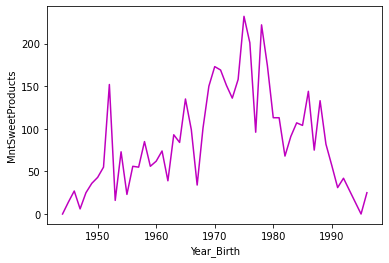

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

graph = df.groupby('Year_Birth').MntSweetProducts.sum()
plt.xlabel('Year_Birth')
plt.ylabel('MntSweetProducts')
plt.plot(graph.index, graph.values, color='m')


#### Больше всего тратят на сладкое люди родившиеся в период 1970-1980гг- поколение х , особенно конец 70-х годов

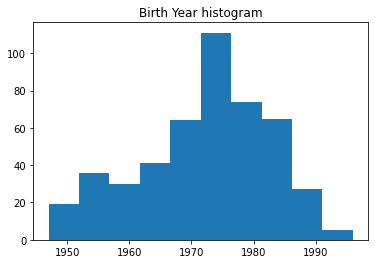

In [203]:
plt.hist(df['Year_Birth'],label='Year_Birth', bins=10)
plt.title('Birth Year histogram')
plt.legend(title='')
plt.show()


####  При этом больше всего покупателей родителось также в период с 1970-1980, следовательно средний возраст составляет приблизительно от 42 до 52 лет, в таком случае в предыдущем графике следует также обратить внимание на рожденных в 90-е

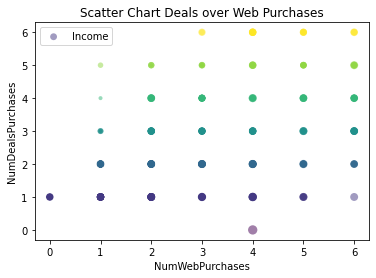

In [256]:
fig, ax = plt.subplots() 
ax.scatter(df['NumWebPurchases'], df['NumDealsPurchases'],s = df['Income'], c = df['NumDealsPurchases'], alpha = 0.5, linewidth = 0)
ax.set_xlabel('NumWebPurchases', fontsize = 10)
ax.set_ylabel('NumDealsPurchases', fontsize = 10)
plt.title('Scatter Chart Deals over Web Purchases')
plt.legend(['Income'])

##### Зависимость числа заказов на сайте от акционных заказов, размер кружов которых проиллюстрирован по доходам, видим, что при разовых покупках на сайте акции почти не используются, тогда как при частых - почти все время

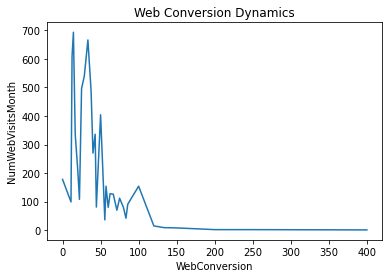

In [248]:
graph = df.groupby('Web_Conversion').NumWebVisitsMonth.sum()
plt.xlabel('WebConversion')
plt.ylabel('NumWebVisitsMonth')
#семинар 3
plt.title('Web Conversion Dynamics')
plt.plot(graph.index, graph.values)


#### из графика видно, что из числа превращений потенциальных покупателей в реальных динамика в основном убывающая- то есть пр меньших посещениях сайта больше конверсия на нем

<AxesSubplot:title={'center':'Meat Products Popularity over Gold Products'}, ylabel='MntMeatProducts'>

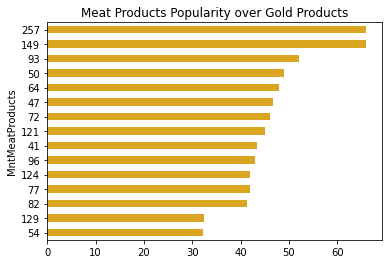

In [249]:
x = df.groupby('MntMeatProducts')['MntGoldProds'].mean().sort_values().tail(15)
plt.title('Meat Products Popularity over Gold Products')
x.plot(kind='barh', color='goldenrod')

#### Источник: https://mode.com/example-gallery/python_horizontal_bar/
#### Видим что из фирменных(золотых) продуктов большую долю составляют категории с мясом, больше всего на продукты с мясом в составе тратили те, кто покупает больше "золотых" блюд

Text(0.5, 1.0, 'Acceptance_3rdCampaign')

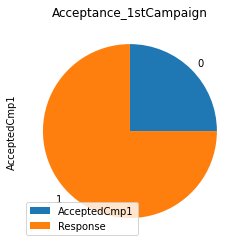

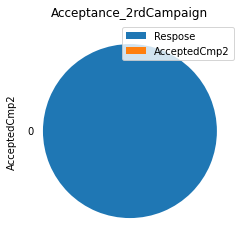

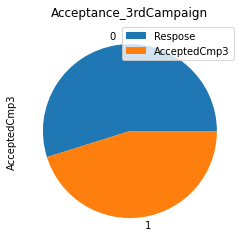

In [275]:
df.groupby(['Response']).sum().plot(kind='pie', y='AcceptedCmp1')
plt.legend(["AcceptedCmp1", "Response"])
plt.title('Acceptance_1stCampaign')

df.groupby(['Response']).sum().plot(kind='pie', y='AcceptedCmp2')
plt.legend(["Respose", "AcceptedCmp2"])
plt.title('Acceptance_2rdCampaign')

df.groupby(['Response']).sum().plot(kind='pie', y='AcceptedCmp3')
plt.legend(["Respose", "AcceptedCmp3"])
plt.title('Acceptance_3rdCampaign')

#### Видим, что во время проведения рекламной кампании, наибольшее внимание клиентов привлекла первая, вторая оказалась вовсе непопулярной, а в третьей цифры принятия/непринятия предложения кампании почти сравненялись

## Задание 8 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

#### Из матрицы ниже видно, что наибольшая корреляция с параметром трат на сладости существует между подростками в семье и трат на сладости, 
#### Отрицательная кореляция свидетельствует следующее: большие затраты на сладости говорят о меньшем количестве подростков в семье, что противоречит стереотипному мнению, при этом взаимосвязь между тратами на сладкие продукты и количетвом детей в семье корреляция еще незначительнее.  Возможно, sweet tongue все же скорее взрослые :)

<AxesSubplot:>

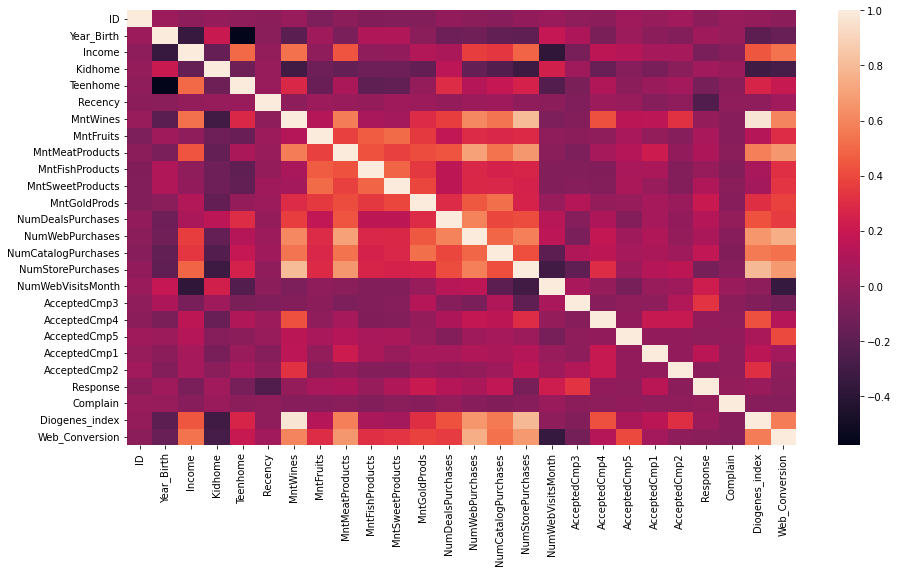

In [182]:
import numpy as np
import seaborn as sns
plt.figure(figsize = (15,8))
sns.heatmap(df.corr())
#посмотрим также графически 